# Zad.

* Wykona kenrlową estymację gęstości 2D.
* Dobierz odpowiednią szerokość okna.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st
from sklearn import cluster, datasets

n_samples = 100
data, data_y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

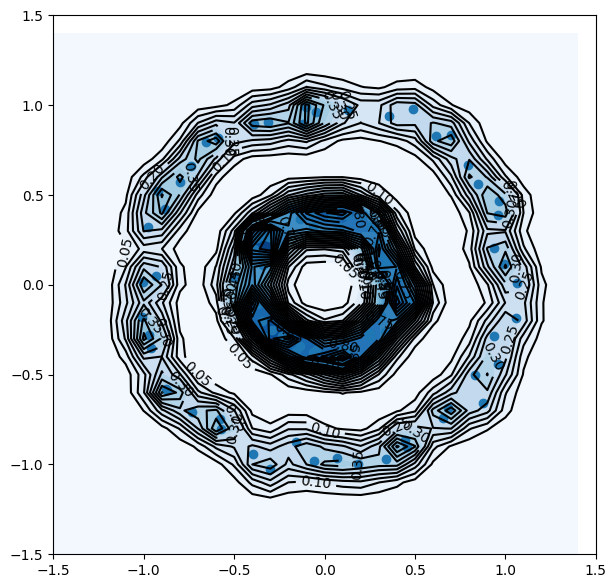

In [2]:
n_samples = 100
data, data_y = datasets.make_circles(n_samples, factor=0.4, noise=0.05)

xmin, xmax = -1.5, 1.5
ymin, ymax = -1.5, 1.5

x, y = np.mgrid[xmin:xmax:.1, ymin:ymax:.1]
positions = np.vstack([x.reshape(-1), y.reshape(-1)])
values = np.vstack([data[:, 0], data[:, 1]])
kernel = st.gaussian_kde(values, bw_method=0.15)
result = np.reshape(kernel(positions).T, x.shape)

fig = pl.figure()
fig.set_size_inches(7, 7)
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(x, y, result, cmap='Blues', levels=20)
cset = ax.contour(x, y, result, colors='k', levels=20)

ax.clabel(cset, inline=1, fontsize=10)

pl.scatter(data[:, 0], data[:, 1])

pl.show()